# Gradient Descent Optimizations

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def f(x):
    return x**2

In [4]:
def f1(x):
    return ((x*x*np.cos(x) - x)/10)

In [5]:
def f2(x):
    return ((x**3 - 3*(x**2) + 4*x))

In [6]:
def f3(x):
    return ((x**2 - 2*x + 1))

In [7]:
def f4(x):
    return x*np.cos(x)

In [8]:
def grad(x):
    return 2*x

In [9]:
def grad_f1(x):
    return (-x*x*np.sin(x) + 2*x*np.cos(x) - 1)/10

In [10]:
def grad_f2(x):
    return (3*(x**2) - 6*x + 4)

In [11]:
def grad_f3(x):
    return (2*x - 2)

In [12]:
def grad_f4(x):
    return (np.cos(x) - x*np.sin(x))

In [13]:
def gd(x, grad, alpha, max_iter=10):
    xs = np.zeros(1 + max_iter)
    xs[0] = x
    for i in range(max_iter):
        x = x - alpha * grad(x)
        xs[i+1] = x
    return xs

In [14]:
def gd_momentum(x, grad, alpha, beta=0.9, max_iter=10):
    xs = np.zeros(1 + max_iter)
    xs[0] = x
    v = 0
    for i in range(max_iter):
        v = beta*v + alpha*grad(x)
        x = x - v
        xs[i+1] = x
    return xs

In [15]:
def gd_adam(x, grad, alpha, b1=0.9, b2=0.999, max_iter=10):
    eps = 0.00000001
    
    xs = np.zeros(1 + max_iter)
    xs[0] = x
    v = 0
    m = 0
    for i in range(max_iter):

        m = b1*m + (1-b1)*grad(x)
        v = b2*v + (1-b2)*(grad(x)*grad(x))
    
        m_hat = m/(1-(b1**(i+1)))
        v_hat = v/(1-(b2**(i+1)))
    
        x = x - ((alpha*m_hat)/(np.sqrt(v_hat)+eps))
        xs[i+1] = x
    return xs

### Gradient descent

### What’s a gradient?

A gradient measures how much the output of a function changes if you change the inputs a little bit.

Gradient Descent is a general function for minimizing a function, in our case, it is used to minimize cost function.



- If gradient descent is working properly, the cost function should decrease after every iteration.


- When gradient descent can’t decrease the cost-function anymore and remains more or less on the same level, it has converged. The number of iterations gradient descent needs to converge can sometimes vary a lot. It can take 50 iterations, 60,000 or maybe even 3 million, making the number of iterations to convergence hard to estimate in advance.


- Think of a function f(x, y) that defines some hilly terrain when graphed as a height map.


- To minimize the function, we can instead follow the negative of the gradient, and thus go in the direction of steepest descent. This is gradient descent. Formally, if we start at a point $x_0$ and move a positive distance ${\alpha}$ in the direction of the negative gradient, then our new and improved $x_1$
$x_{1} = x_{0} - {\alpha}({\Delta f(x)})$


In general
$x_{t} = x_{t-1} - {\alpha}({\Delta f(x)})$

<img src="files/gd.png" align="left" width="300" height="150">
<img src="files/gd_2D.png" align="right" width="600" height="300">


### Stochastic Gradient descent with small step size

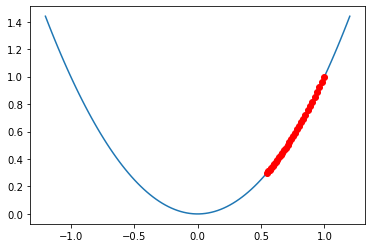

In [16]:
alpha = 0.01
x0 = 1
xs = gd(x0, grad, alpha,max_iter=30)
xp = np.linspace(-1.2, 1.2, 100)
plt.plot(xp, f(xp))
plt.plot(xs, f(xs), 'o-', c='red')
#for i, (x, y) in enumerate(zip(xs, f(xs)), 1):
    #plt.text(x, y+0.2, i, 
             #bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
pass

### Stochastic Gradient descent with moderate step size

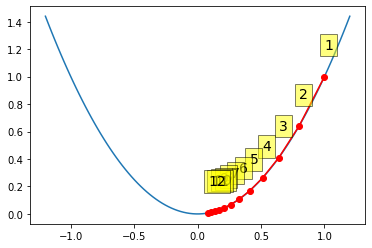

In [17]:
alpha = 0.1
x0 = 1
xs = gd(x0, grad, alpha,max_iter=11)
xp = np.linspace(-1.2, 1.2, 100)
plt.plot(xp, f(xp))
plt.plot(xs, f(xs), 'o-', c='red')
for i, (x, y) in enumerate(zip(xs, f(xs)), 1):
    plt.text(x, y+0.2, i, 
             bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
pass

### Stochastic Gradient descent with large step size

When the step size is too large, gradient descent can oscillate and even diverge.

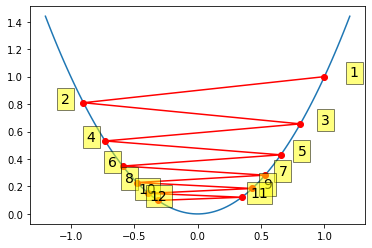

In [18]:
alpha = 0.95
x0 = 1
xs = gd(x0, grad, alpha, 11)
xp = np.linspace(-1.2, 1.2, 100)
plt.plot(xp, f(xp))
plt.plot(xs, f(xs), 'o-', c='red')
for i, (x, y) in enumerate(zip(xs, f(xs)), 1):
    plt.text(x*1.2, y, i,
             bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
pass

### Importance choosing initial value

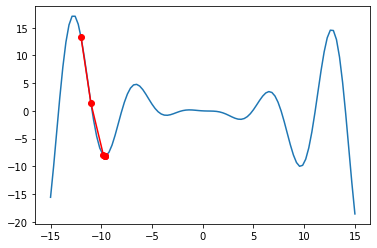

In [19]:
alpha = 0.1
x0 = -12
xs = gd(x0, grad_f1, alpha,5)
xp = np.linspace(-15, 15, 100)
plt.plot(xp, f1(xp))
plt.plot(xs, f1(xs), 'o-', c='red')
#for i, (x, y) in enumerate(zip(xs, f1(xs)), 1):
    #plt.text(x*1.2, y, i,
             #bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
pass

### Gradient descent with momentum
- Problem with plain/vanialla gradient descent is that it is frustrating slow. Though it always converges given a small learning rate, the takes many many iterations to achieve that.


- In momentum gradient descent, we add an extra weight to the previous update of the algorithm and add that to the current update vector.


- Essentially, when using momentum, we push a ball down a hill. The ball accumulates momentum as it rolls downhill, becoming faster and faster on the way as it keeps moving downward. The same thing happens to our parameter updates: The momentum term increases for dimensions whose gradients point in the same directions and reduces updates for dimensions whose gradients change directions. As a result, we gain faster convergence and reduced oscillation.


$v_{t} = {\beta}v_{t-1} + {\alpha}({\Delta f(x)})$

$x = x - {v_t}$

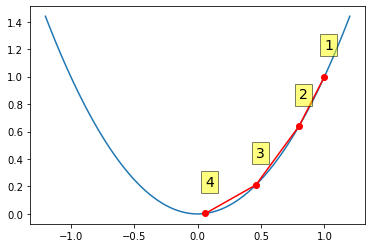

In [20]:
alpha = 0.1
x0 = 1
xs = gd_momentum(x0, grad, alpha, beta=0.9,max_iter=3)
xp = np.linspace(-1.2, 1.2, 100)
plt.plot(xp, f(xp))
plt.plot(xs, f(xs), 'o-', c='red')
for i, (x, y) in enumerate(zip(xs, f(xs)), 1):
    plt.text(x, y+0.2, i, 
             bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
pass

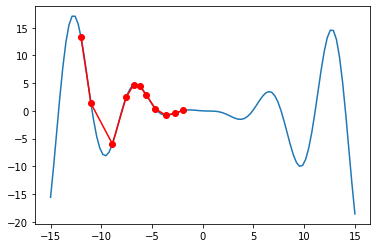

In [21]:
alpha = 0.1
x0 = -12
xs = gd_momentum(x0, grad_f1, alpha, beta=0.9,max_iter=10)
xp = np.linspace(-15, 15, 100)
plt.plot(xp, f1(xp))
plt.plot(xs, f1(xs), 'o-', c='red')
#for i, (x, y) in enumerate(zip(xs, f1(xs)), 1):
#    plt.text(x*1.2, y, i,
#             bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
pass

### Adam Optimizer

$m_t = {\beta_1}*m_{t-1} + (1 - {\beta_1})*{\Delta}f(x)$

$v_t = {\beta_2}*v_{t-1} + (1 - {\beta_2})*{\Delta}f(x)^2$

$\hat{m_t} = \frac{\hat{m_t}}{1 - {\beta_1}^t}$

$\hat{v_t} = \frac{\hat{v_t}}{1 - {\beta_2}^t}$

$x_{t+1} = x_t - \frac{{\alpha} * \hat{m_t}} {\\sqrt({\hat{v_t}}) + \epsilon}$

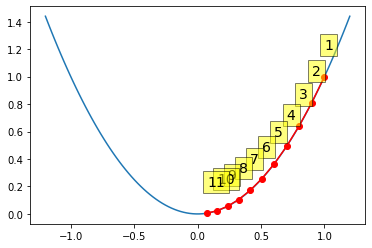

In [22]:
alpha = 0.1
x0 = 1

xs = gd_adam(x0, grad, alpha, b1=0.9, b2=0.999, max_iter=10)
xp = np.linspace(-1.2, 1.2, 100)

plt.plot(xp, f(xp))
plt.plot(xs, f(xs), 'o-', c='red')

for i, (x, y) in enumerate(zip(xs, f(xs)), 1):
    plt.text(x, y+0.2, i, 
             bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
pass

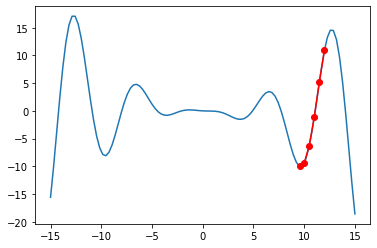

In [23]:
alpha = 0.5
x0 = 12
xs = gd_adam(x0, grad_f1, alpha, b1=0.9, b2=0.999, max_iter=5)
xp = np.linspace(-15, 15, 100)
plt.plot(xp, f1(xp))
plt.plot(xs, f1(xs), 'o-', c='red')
#for i, (x, y) in enumerate(zip(xs, f1(xs)), 1):
#    plt.text(x*1.2, y, i,
#             bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
pass

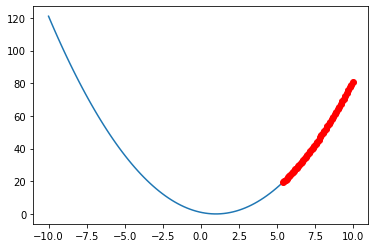

In [24]:
alpha = 0.1
x0 = 10

xs = gd_adam(x0, grad_f3, alpha, b1=0.9, b2=0.999, max_iter=50)
xp = np.linspace(-10, 10, 100)

plt.plot(xp, f3(xp))
plt.plot(xs, f3(xs), 'o-', c='red')

#for i, (x, y) in enumerate(zip(xs, f2(xs)), 1):
#    plt.text(x, y+0.2, i, 
#             bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
pass

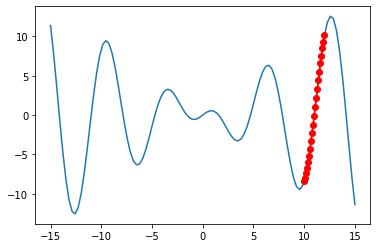

In [25]:
alpha = 0.1
x0 = 12
xs = gd_adam(x0, grad_f4, alpha, b1=0.9, b2=0.999, max_iter=20)
xp = np.linspace(-15, 15, 100)
plt.plot(xp, f4(xp))
plt.plot(xs, f4(xs), 'o-', c='red')
#for i, (x, y) in enumerate(zip(xs, f1(xs)), 1):
#    plt.text(x*1.2, y, i,
#             bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
pass
